In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##    Data Cleaning


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5463,ham,U GOIN OUT 2NITE?,NaN,NaN,NaN
1439,ham,In fact when do you leave? I think addie goes ...,NaN,NaN,NaN
3625,ham,Yeah right! I'll bring my tape measure fri!,NaN,NaN,NaN
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...,NaN,NaN,NaN
2983,ham,He said that he had a right giggle when he saw...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df = df.replace({'ham': 0, 'spam':1})
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample()

,target,text
576,0,I'm tired of arguing with you about this week ...


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## EDA

In [16]:
num_ham_spam = df.target.value_counts()
num_ham_spam

0    4516
1     653
Name: target, dtype: int64

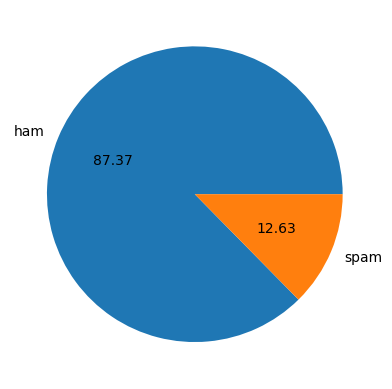

In [17]:
plt.pie(num_ham_spam, labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [18]:
import nltk

nltk.download('punkt')

In [19]:
# # simple way
# df['number_of_char'] = 0
# for char in np.arange(0, len(df.text)):
#     df.loc[char, 'number_of_char'] = len(df.loc[char, 'text'])

In [20]:
# with nltk 
df['num_chars'] = df['text'].apply(len)
df.sample(5)

,target,text,num_chars
2875,0,Fuck cedar key and fuck her (come over anyway ...,50
2409,0,Aww that's the first time u said u missed me w...,99
149,0,Sindu got job in birla soft ..,30
5173,0,U 2.,4
3677,1,Promotion Number: 8714714 - UR awarded a City ...,179


In [21]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_chars,num_words
5123,0,"Hi Chikku, send some nice msgs",30,7
4668,0,"When I was born, GOD said, \Oh No! Another IDI...",70,19
988,0,Yun ah.the ubi one say if Ì_ wan call by tomor...,162,29
1199,0,NEFT Transaction with reference number &lt;#&...,164,53
908,0,WHITE FUDGE OREOS ARE IN STORES,31,6


In [22]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_chars,num_words,num_sentences
4719,0,Forgot to tell Ì_ smth.. Can Ì_ like number th...,79,18,1
3280,0,I tot it's my group mate... Lucky i havent rep...,84,21,1
2032,0,"Yes, i'm small kid.. And boost is the secret o...",59,16,1
3882,0,Gumby's has a special where a &lt;#&gt; \ che...,96,29,1
5130,0,Any way where are you and what doing.,37,9,1


In [23]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# Targetting ham messages
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# Targetting ham messages
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


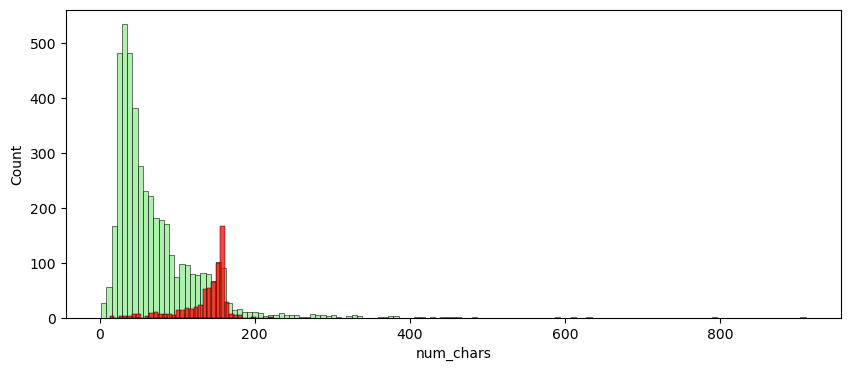

In [26]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_chars'], color='lightgreen')
sns.histplot(df[df['target']==1]['num_chars'], color='red')
plt.show()

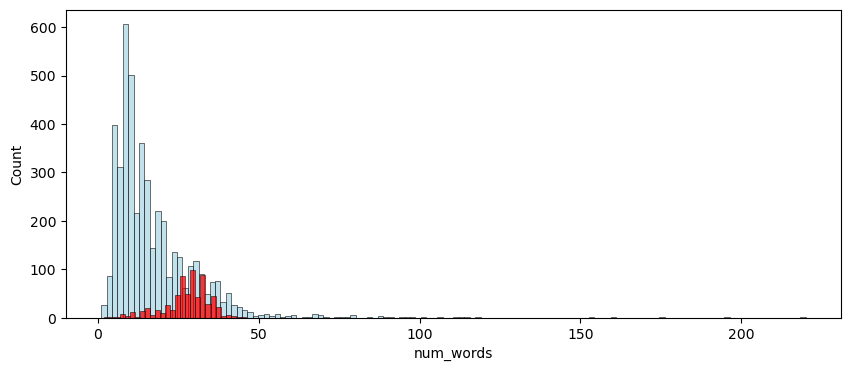

In [27]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_words'], color='lightblue')
sns.histplot(df[df['target']==1]['num_words'], color='red')
plt.show()

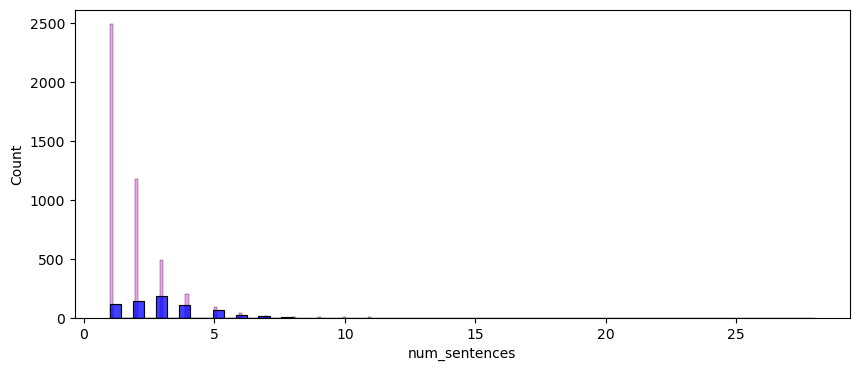

In [28]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_sentences'], color='violet')
sns.histplot(df[df['target']==1]['num_sentences'], color='blue')
plt.show()

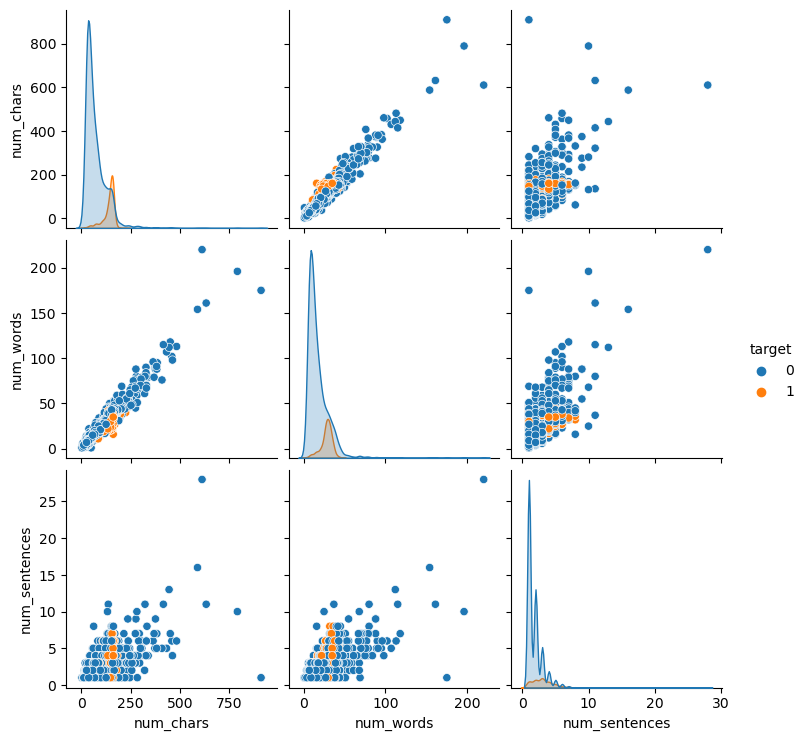

In [29]:
sns.pairplot(df, hue='target')
plt.show()

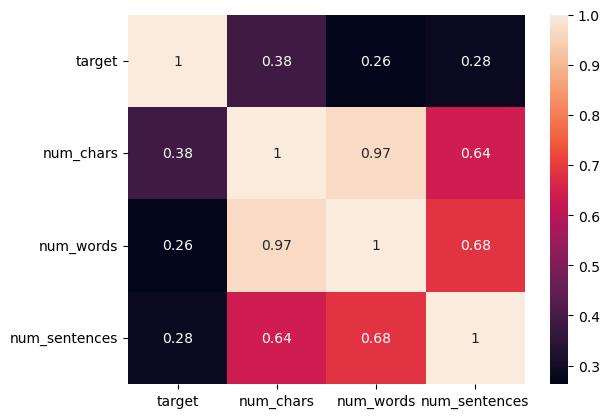

In [30]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data preprocessing

In [31]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# nltk.download('stopwords')

In [32]:
#  Lower case, Tokenization, Removing stop words and punctuation and Stemming

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text =y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [33]:
# Checking the method
transformed_text = transform_text("all I am enough happy with my life..")
print(transformed_text)

enough happi life


In [34]:
#  Applying the method in the dataset
df['transformed_text'] = df['text'].apply(transform_text)


In [35]:
df.sample(5)

,target,text,num_chars,num_words,num_sentences,transformed_text
1843,0,Super da:)good replacement for murali,37,8,1,super da good replac murali
1099,0,Been up to ne thing interesting. Did you have ...,106,25,4,ne thing interest good birthday u wrking nxt s...
4260,0,Pls dont forget to study,24,5,1,pl dont forget studi
4856,0,Thanks and ! Or bomb and date as my phone wan...,58,14,2,thank bomb date phone want say
4752,1,Cashbin.co.uk (Get lots of cash this weekend!)...,155,31,3,get lot cash weekend dear welcom weekend got b...


In [36]:
from wordcloud import WordCloud

In [37]:
wc = WordCloud(width =500,height=500,min_font_size=10, background_color='white')

In [38]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

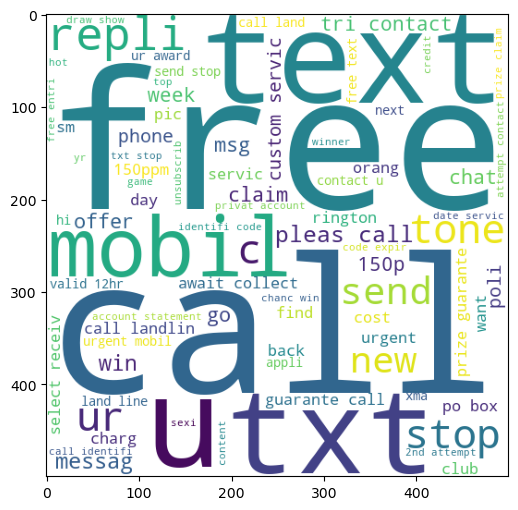

In [39]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)
plt.show()

In [40]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

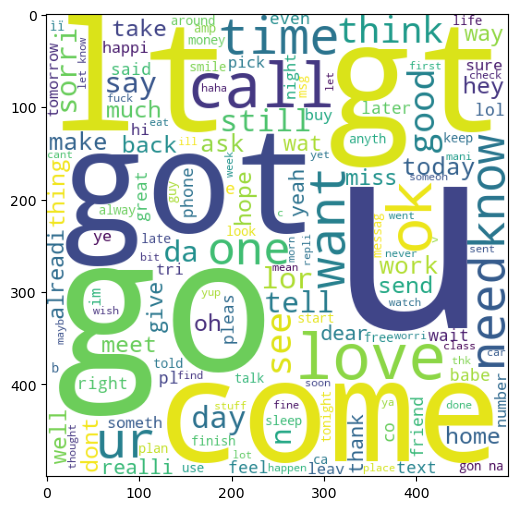

In [41]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)
plt.show()

## Model building

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [43]:
y = df['target']
cv = CountVectorizer()
tdf = TfidfVectorizer(max_features=30000)
X = tdf.fit_transform(df['transformed_text']).toarray()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8700696055684455
[[992 138]
 [ 30 133]]
0.4907749077490775


In [48]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9597834493426141
[[1130    0]
 [  52  111]]
1.0


In [49]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier


In [51]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
dt = DecisionTreeClassifier(max_depth=5)
knb = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
adb = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gc = GradientBoostingClassifier(n_estimators=50, random_state=2)


In [52]:
clfs = {
    "LR" : lr,
    "SVC": svc,
    "DT" : dt,
    "KN" : knb,
    "RF" : rf,
    "ADB": adb,
    "BC" : bc,
    "ETC": etc,
    "GC" : gc
       }

In [53]:
def trainClassifier(clf, X_train,y_train,X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return acc, precision


In [ ]:
accuracy_scores = []
precision_scores= []

for name, clf in clfs.items():
    current_accuracy, current_precision = trainClassifier(clf, X_train,y_train,X_test, y_test)
    
    print ("For", name)
    print("Accuracy : ", current_accuracy, " , Precision : ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy :  0.9520494972931168  , Precision :  0.9391304347826087
For SVC
Accuracy :  0.9729311678267595  , Precision :  0.9776119402985075
For DT
Accuracy :  0.9319412219644239  , Precision :  0.8048780487804879
For KN
Accuracy :  0.9033255993812839  , Precision :  1.0
For RF
Accuracy :  0.974477958236659  , Precision :  1.0
For ADB
Accuracy :  0.9613302397525135  , Precision :  0.9312977099236641
For BC
Accuracy :  0.9605568445475638  , Precision :  0.868421052631579
For ETC
Accuracy :  0.9791183294663574  , Precision :  0.9927536231884058


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision' , ascending= False)
performance_df

In [ ]:
performance_df_for_algorithm = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df_for_algorithm

In [ ]:
sns.catplot(x='Algorithm', y= 'value', hue='variable', data = performance_df_for_algorithm, kind='bar', height=5)
plt.show()

In [ ]:
import pickle

In [ ]:
# using the best accuracy and precision model - randomForestClassifier

pickle.dump(tdf, open('Vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))